In [1]:
from scripts import optimization, model, visualizations
import numpy as np
np.random.seed(1)

import matplotlib.pyplot as plt
import pickle


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.6.0
 Built: Sep 28 2023 11:53:34

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [2]:
#Parameters

input_weights_path = '/hpc/mzhu843/modelling/nest/DATA/processed/model2/setup1/input_weights.npy'
input_weights_2_path = '/hpc/mzhu843/modelling/nest/DATA/processed/model2/setup1/input_weights_0.4.npy'
weights_1_path = '/hpc/mzhu843/modelling/nest/DATA/processed/model2/setup1/weights1.npy'
weights_2_path = '/hpc/mzhu843/modelling/nest/DATA/processed/model2/setup1/weights2.npy'
results_dir = '/hpc/mzhu843/modelling/nest/results/optimisation/setup_1/'

move_params = {
                'weights_range': [(-10, 20)],
                'weights_change_range': [(-2, 2)],
                'optimise_input_weights': [False]
            }
lamb = 0

optimisation_steps = 20000
runtime = 3000
resolution = 1

cost_type = 'standard'

input_weights_1 = np.load(input_weights_path)
weights_1 = np.load(weights_1_path)
weights_2 = np.load(weights_2_path)
small_categorized_neurons_path = '/hpc/mzhu843/modelling/nest/DATA/processed/model2/small_categorised_neurons_5.pkl'

save_results = True
save_calcium = False


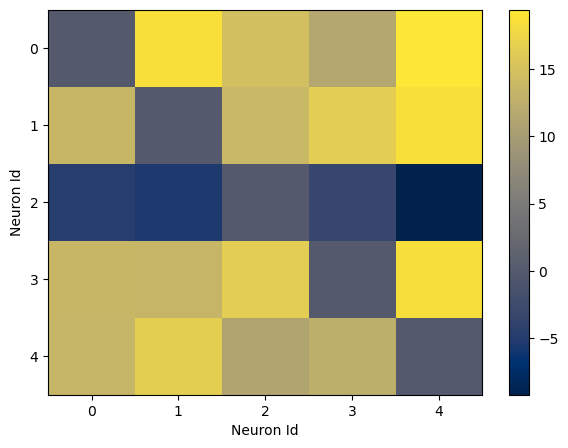

In [3]:
visualizations.plot_matrix(weights_1[:5, :5])


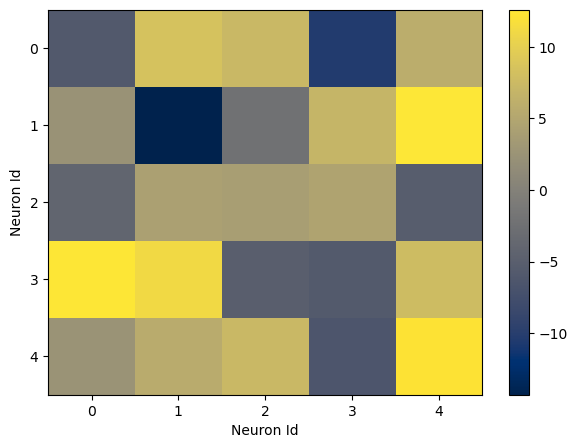

In [4]:
visualizations.plot_matrix(weights_2[:5, :5])

In [5]:
with open(small_categorized_neurons_path, 'rb') as file:
    small_categorized_neurons = pickle.load(file)
print(len(small_categorized_neurons['Place']))

5


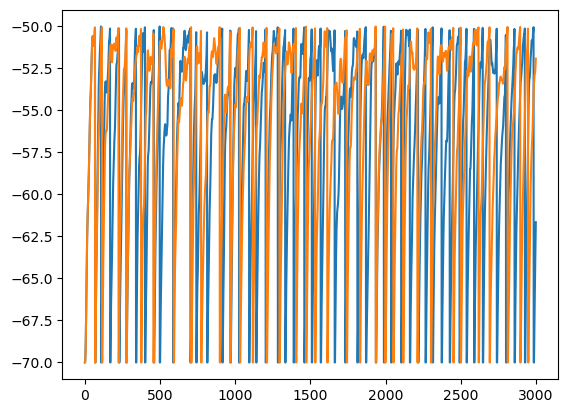

In [6]:
networkA = model.Model2(small_categorized_neurons, weights_1, input_weights_1, resolution=resolution)
networkB = model.Model2(small_categorized_neurons, weights_2, input_weights_1, resolution=resolution)

networkA.simulate()
networkB.simulate()

place_obs = networkA.get_voltage_traces()
spikes_obs = networkA.get_spike_trains()

plt.plot(place_obs[2])
plt.plot(networkB.get_voltage_traces()[2])

plt.show()

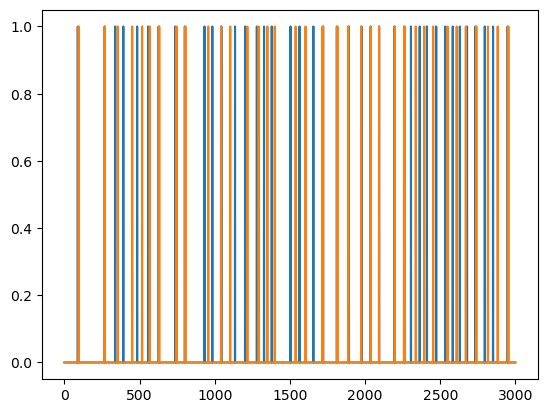

In [7]:
plt.plot(networkA.get_spike_trains()[0])
plt.plot(networkB.get_spike_trains()[0])

In [8]:
problem = optimization.SimulatedAnnealing2(weights_2, place_obs, spikes_obs, lamb, small_categorized_neurons, input_weights_1, move_params, cost_type=cost_type, resolution=resolution)
problem.steps = optimisation_steps

In [9]:
sensitivity_analysis = optimization.SensitivityAnalysis2(move_params, problem, ['weights_range', 'weights_change_range'], weights1= weights_1, input_weights1=input_weights_1, 
                                                    save_results=save_results, save_calcium=save_calcium, results_dir=results_dir)
param_perms = sensitivity_analysis.generate_param_permutations()
results = sensitivity_analysis.run_analysis()

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
  7549.87930     251887.45    25.00%    12.00%     0:00:29     0:03:11 Temperature        Energy    Accept   Improve     Elapsed   Remaining
 14385.99843     311485.01    62.00%    31.50%     0:00:16     0:04:18 Temperature        Energy    Accept   Improve     Elapsed   Remaining
  8278.27804     243870.87    35.00%    16.50%     0:00:40     0:04:54